In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

In [3]:
dataset = load_breast_cancer()
X, y = dataset.data, dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [4]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [5]:
y_pred = clf.predict(X_test)

report = classification_report(y_test, y_pred, output_dict=True)
cv_score = np.mean(cross_val_score(clf, X, y))

recall, f1score, _, _ = report["macro avg"].values()

In [6]:
print(
    "--- Model evaluation ---",
    f"y predictions   : {y_pred[:10]}",
    f"y labels        : {y_test[:10]}",
    f"CV score        : {cv_score:.2f}",
    f"Average recall  : {recall:.2f}",
    f"Average F1 score: {f1score:.2f}",
    sep="\n"
)

--- Model evaluation ---
y predictions   : [1 0 0 1 0 0 1 0 0 1]
y labels        : [1 0 1 1 0 0 1 0 0 1]
CV score        : 0.96
Average recall  : 0.97
Average F1 score: 0.97


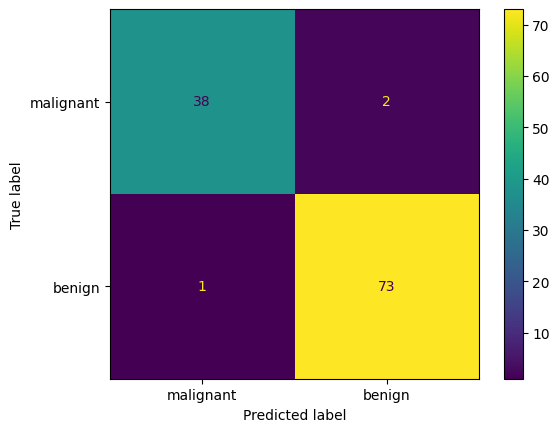

In [7]:
confmat = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confmat, display_labels=dataset.target_names).plot()

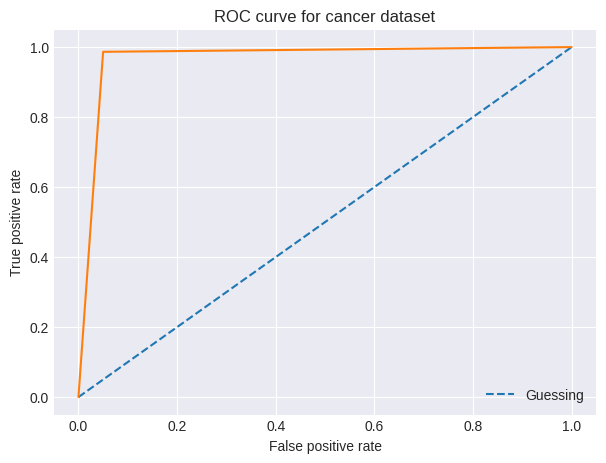

In [8]:
fpr, tpr, _ = roc_curve(y_test, y_pred)

plt.style.use("seaborn-v0_8-darkgrid")
plt.figure(figsize=(7, 5))
plt.title("ROC curve for cancer dataset")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.plot(fpr, tpr)
plt.legend(["Guessing"])
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.show()